In [1]:
import pandas as pd
import os
import numpy as np

In [ ]:
# Define the folder where the data files are located
folder_path = "../dataset/price/preprocessed"

# Define the time period
start_date = "2017-01-01"
end_date = "2017-12-31"

# Initialize a dictionary to store data for each company
company_data = {}

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):  # Ensure it's a data file
        company_name = file_name.split(".")[0]  # Extract company name
        file_path = os.path.join(folder_path, file_name)
        
        # Load the data
        df = pd.read_csv(file_path, sep="\t", header=None)
        df.columns = ["date", "movement_percent", "open_price", "high_price", "low_price", "close_price", "volume"]
        df["date"] = pd.to_datetime(df["date"])  # Convert date to datetime
        
        # Filter data based on the date range
        filtered_df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]
        
        # Store in the dictionary
        company_data[company_name] = filtered_df

# Now `company_data` contains filtered data for each company


FileNotFoundError: [WinError 3] Systemet finner ikke angitt bane: 'dataset/price/preprocessed'

In [4]:
company_data["AAPL"]

,date,movement_percent,open_price,high_price,low_price,close_price,volume
0,2017-09-01,0.000305,0.004878,0.005732,-0.002256,0.050003,16552800.0
1,2017-08-31,0.003979,0.001775,0.007163,0.000796,0.649994,26785100.0
2,2017-08-30,0.002701,0.005463,0.006016,-0.001842,0.440002,27269600.0
3,2017-08-29,0.008918,-0.008485,0.010219,-0.009104,1.440003,29516900.0
4,2017-08-28,0.010071,0.001752,0.013387,0.000438,1.610000,25966000.0
...,...,...,...,...,...,...,...
164,2017-01-09,0.009159,0.012785,0.025493,0.012699,1.066719,33561900.0
165,2017-01-06,0.011148,0.013917,0.025899,0.011226,1.284035,31751900.0
166,2017-01-05,0.005085,0.011569,0.019772,0.010609,0.582748,22193600.0
167,2017-01-04,-0.001119,0.009826,0.015579,0.008955,-0.128402,21118100.0


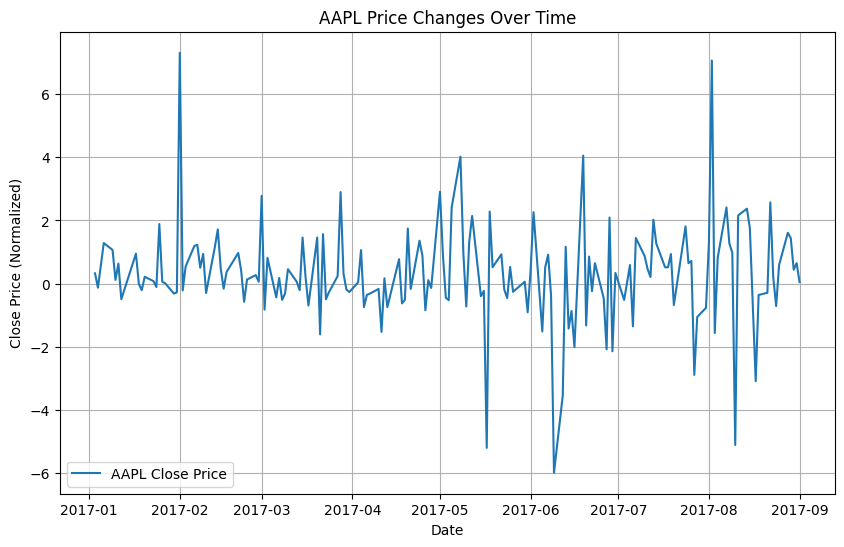

In [5]:
import matplotlib.pyplot as plt

def plot_price_changes(company_name, data_dict):
    if company_name in data_dict:
        company_data = data_dict[company_name]
        
        plt.figure(figsize=(10, 6))
        plt.plot(company_data["date"], company_data["close_price"], label=f"{company_name} Close Price")
        plt.title(f"{company_name} Price Changes Over Time")
        plt.xlabel("Date")
        plt.ylabel("Close Price (Normalized)")
        plt.grid()
        plt.legend()
        plt.show()
    else:
        print(f"Company {company_name} not found in the data dictionary.")

plot_price_changes("AAPL", company_data)


In [12]:
def create_sequences(data, features, sequence_length=5):
    """
    Creates sequences of 5 consecutive rows for features and uses the next row for the target.

    Parameters:
        data (DataFrame): The dataset with features and target.
        features (list): List of column names to use as features.
        sequence_length (int): Number of rows in each sequence.

    Returns:
        X (numpy array): Input sequences of shape (samples, sequence_length, features).
        y (numpy array): Corresponding target labels.
    """
    X, y = [], []

    for i in range(len(data) - sequence_length):
        # Extract the sequence of 5 rows
        X.append(data[features].iloc[i:i+sequence_length].values)
        # Use the 6th row's target
        y.append(data["target"].iloc[i + sequence_length])
    
    return np.array(X), np.array(y)

# Define features for the input
features = ["movement_percent", "open_price", "high_price", "low_price", "close_price", "volume"]
data = company_data["AAPL"]
# Create the target column (1 for up, 0 for down)
data["target"] = (data["close_price"].shift(-1) > data["close_price"]).astype(int)
data = data[:-1]  # Drop the last row since it has no target

# Generate sequences
X, y = create_sequences(data, features)

X = X.reshape([163, 5*6])
print(f"Input shape: {X.shape}, Target shape: {y.shape}")
X,y


Input shape: (163, 30), Target shape: (163,)


(array([[ 3.050000e-04,  4.878000e-03,  5.732000e-03, ...,  4.380000e-04,
          1.610000e+00,  2.596600e+07],
        [ 3.979000e-03,  1.775000e-03,  7.163000e-03, ...,  0.000000e+00,
          5.899970e-01,  2.548010e+07],
        [ 2.701000e-03,  5.463000e-03,  6.016000e-03, ..., -8.939000e-03,
         -7.099920e-01,  1.981890e+07],
        ...,
        [-1.761000e-03,  1.125300e-02,  1.558300e-02, ...,  1.269900e-02,
          1.066719e+00,  3.356190e+07],
        [-4.175000e-03,  5.255000e-03,  8.637000e-03, ...,  1.122600e-02,
          1.284035e+00,  3.175190e+07],
        [ 5.373000e-03,  9.296000e-03,  1.941100e-02, ...,  1.060900e-02,
          5.827480e-01,  2.219360e+07]]),
 array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
     